# COGS 108 Final Project - Lung Cancer Analysis

Video: https://drive.google.com/drive/folders/19TfIi2kP8ueIyv-1IHQk4XQKUKJexpTC

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* ['X'] NO - keep private

# Overview

In this project, we researched and analyzed the significance of demographic factors age, gender, and race as well as smoking status in regards to an individual’s likelihood of developing lung cancer. Our data analysis reveals that despite similar rates of prevalence in male and females, men have a higher chance of developing the disease. Age and racial background also seems to contribute to risk for lung cancer as the disease is more common in individuals around 55 years of age, potentially due to smoking habits or exposure to toxic substances, and White individuals.

# Names

- Nhathan Nguyen - A16350214
- Shauna Huang - A16651035
- Jeffrey Ly - A17231615
- Valeria Avila -A17608647

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between demographic factors (e.i. age, gender, race), smoking status, and risk for lung cancer?

<a id='background'></a>

## Background & Prior Work

As one of the leading causes of global cancer incidence and mortality, lung cancer accounts for an estimate of 1.8 million diagnoses and 1.6 million deaths each year (Hirsch et al., 2016). Researchers posit that the prevalence of lung cancer can be attributed to our increasing access to tobacco and the industrialization of emerging economies around the world. Specifically in the US, there are an estimated 238,340 new cases and 127,070 deaths due to lung cancer in 2023 (American Cancer Society). While there are a number of treatments like surgery, immunotherapy, and chemotherapy to combat the disease, cases in the US experience a 5-year survival rate of 16% (Wood et al., 2015). There are a myriad of studies documenting the cancer risks associated with various factors where we’ll be looking at demographics, smoking status, and medical conditions that may increase chances of lung cancer in the US population.

According to the American Cancer Society, lung cancer risk factors are tobacco smoke and exposure to secondhand smoke, radon, asbestos, and other carcinogenic agents through the workplace or diet. Aside from the risk factors caused by lifestyle and environment, there are risk factors of air pollution and family history of lung cancer, which we cannot control. Smoking is by far the most prevalent risk factor for lung cancer with approximately 80% of lung cancer deaths attributed to the activity (American Cancer Society). Exposure to chemicals in the environment significantly contributes to lung cancer and cancer risk in general. According to the World Health Organization (WHO), there are over 500 toxic substances in the environment. These substances are classified into 3 characteristic groups with 126 substances that are confirmed to be carcinogenic to humans, 94 that are posited to be carcinogenic, and 322 that are potentially carcinogenic. With prior knowledge into the common lifestyle and environmental risk factors for lung cancer, we are interested in developing a predictive model that can identify risk relationships for lung cancer and demographics and smoking status of individuals.

References:
https://www.termedia.pl/Epidemiology-of-lung-cancer,3,43345,0,1.html 
https://www.sciencedirect.com/science/article/abs/pii/S0305737215000298 
https://www.thelancet.com/article/S0140-6736(16)30958-8/fulltext 
https://www.cancer.org/cancer/types/lung-cancer.html 
https://www.who.int/news-room/fact-sheets/detail/cancer  

# Hypothesis


We predict that the US population will have higher chances of being diagnosed with lung cancer if they’re over 50 years of age and participate in smoking tobacco, with a higher risk of developing the disease as smoking frequency increases.

We believe this hypothesis to be true because numerous studies demonstrate the most prevalent risk factor for lung cancer is exposure to tobacco smoke and the presence of a strong correlation between lung cancer patients and age, with the average age of patients being 55 years of age.

By using algorithms on a dataset consisting of medical data such as patient age, gender, race and medical condition, we can develop a predictive model that accurately identities patients who have lung cancer.


# Dataset(s)


- Dataset Name: Survey of Lung Cancer
- Link to the dataset: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer
- Number of observations: 53,703

This data set contains information that is surveyed from patients who have had lung cancer and some symptoms that they had. It also contains gender, age and smoking status. 

- Dataset Name: lung_cancer
- Link to the dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
- Number of observations: 276

This data set holds observations from a different study which collected the most common race to have lung cancer due to the three pillars of gender, age and smoking status.

We wanted to connect these two sets due to the fact that they are observed in differrent ways (interview and survey) and both are similar in the sense that they have the columns related to age, gender and smoking status, which all are strong features in identifying who and the chances of having lung cancer. 

# Setup

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('survey lung cancer.csv')
data2 = pd.read_csv('lung_cancer.csv')

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
data2.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [3]:
print(data.columns)
print(data2.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
Index(['pid', 'age', 'gender', 'race', 'smoker', 'days_to_cancer',
       'stage_of_cancer'],
      dtype='object')


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('survey lung cancer.csv')
data2 = pd.read_csv('lung_cancer.csv')

data1.columns = data1.columns.str.lower()
data2.columns = data2.columns.str.lower()

# Preview the data
data1.head()


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data2.head()

,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [6]:
data = pd.concat([data1, data2], ignore_index=True, sort=False)

# Remove duplicates
data = data.drop_duplicates()

# missing values
# data = data.dropna()

print(data['gender'].unique())

# data['age'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())

# data = pd.get_dummies(data, columns=['gender'])

# Print the cleaned data
data.head(100)

['M' 'F' 'Male' 'Female']


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,...,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,pid,race,smoker,days_to_cancer,stage_of_cancer
0,M,69,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
1,M,74,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
2,F,59,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,NO,NaN,NaN,NaN,NaN,NaN
3,M,63,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,NO,NaN,NaN,NaN,NaN,NaN
4,F,63,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,NO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,60,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
96,F,61,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
97,M,59,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,YES,NaN,NaN,NaN,NaN,NaN
98,M,64,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,1.0,2.0,1.0,YES,NaN,NaN,NaN,NaN,NaN


In [7]:
data.head(5)

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,...,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer,pid,race,smoker,days_to_cancer,stage_of_cancer
0,M,69,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
1,M,74,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,YES,NaN,NaN,NaN,NaN,NaN
2,F,59,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,...,2.0,2.0,1.0,2.0,NO,NaN,NaN,NaN,NaN,NaN
3,M,63,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,NO,NaN,NaN,NaN,NaN,NaN
4,F,63,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,NO,NaN,NaN,NaN,NaN,NaN


In [8]:
#Information cleaned and able to visually see
data.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53703 entries, 0 to 53735
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 53703 non-null  object 
 1   age                    53703 non-null  int64  
 2   smoking                276 non-null    float64
 3   yellow_fingers         276 non-null    float64
 4   anxiety                276 non-null    float64
 5   peer_pressure          276 non-null    float64
 6   chronic disease        276 non-null    float64
 7   fatigue                276 non-null    float64
 8   allergy                276 non-null    float64
 9   wheezing               276 non-null    float64
 10  alcohol consuming      276 non-null    float64
 11  coughing               276 non-null    float64
 12  shortness of breath    276 non-null    float64
 13  swallowing difficulty  276 non-null    float64
 14  chest pain             276 non-null    float64
 15  lu

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['gender'] = encoder.fit_transform(data['gender'])
data['lung_cancer'] = encoder.fit_transform(data['lung_cancer'])

/tmp/ipykernel_1962/280197394.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = "BuPu_r")


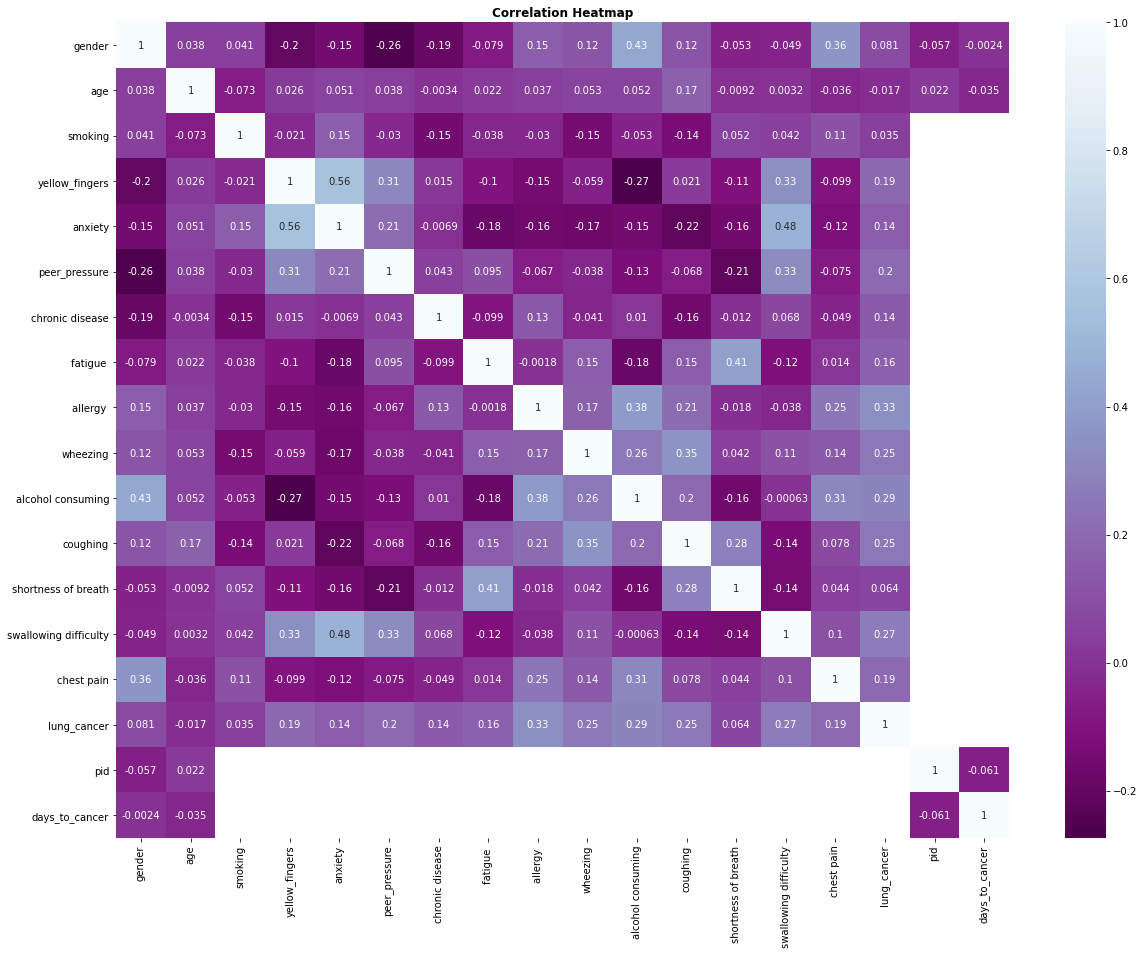

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True, cmap = "BuPu_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

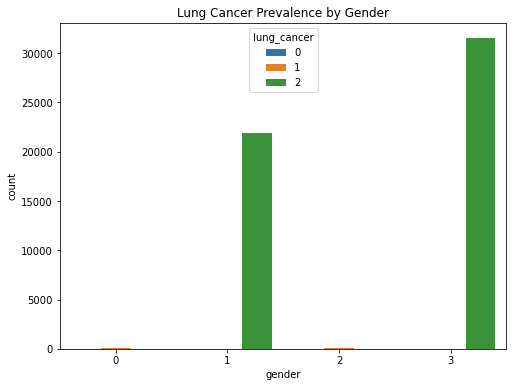

In [11]:
#Lung Cancer Prevalence based on gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='lung_cancer')
plt.title('Lung Cancer Prevalence by Gender')
plt.show()

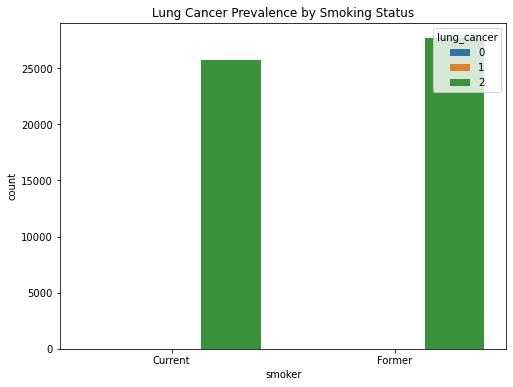

In [12]:
#Smoking Status 
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='smoker', hue='lung_cancer')
plt.title('Lung Cancer Prevalence by Smoking Status')
plt.show()

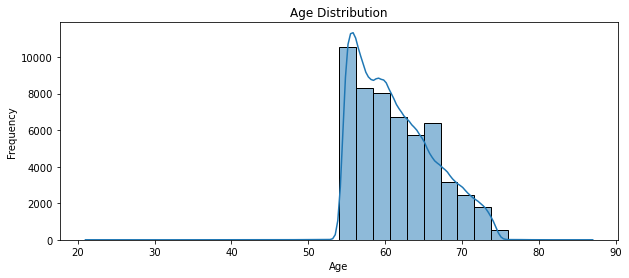

In [13]:
#Age Distribution
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

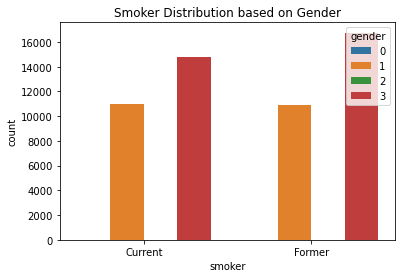

In [14]:
#Smoking Distribution based on Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='smoker', hue='gender')
plt.title('Smoker Distribution based on Gender')
plt.show()

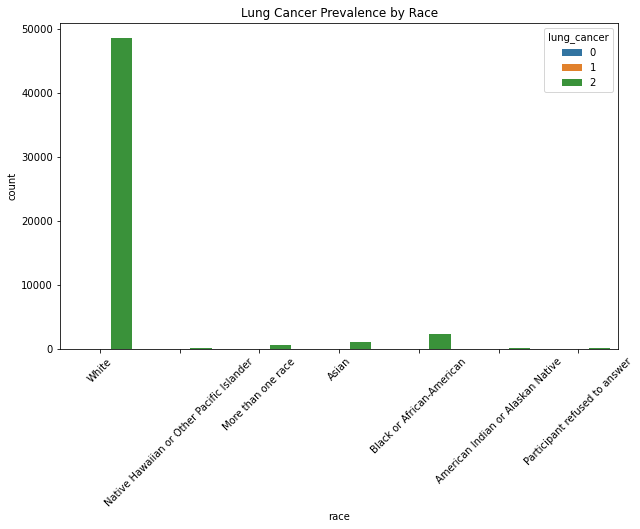

In [15]:
#Risk of Lung Cancer Based on Race
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', hue='lung_cancer')
plt.title('Lung Cancer Prevalence by Race')
plt.xticks(rotation=45)
plt.show()

# Ethics & Privacy

The research topic and datasets involved in this study include patients’ personal medical data regarding their demographics and medical history. Maintaining the confidentiality of patients’ data that are involved in research is a fundamental principle in healthcare. When looking for datasets for analysis, we took into consideration factors such as the minimization of potential confounding variables, patient anonymity, and biases. 

We analyzed datasets that were derived from surveys that obtained informed consent from their participants. It’s important to note that no personally identifiable information was collected. When it comes to potential biases, we anticipate no issues arising from data collection since the participants involved in these datasets encompass a diverse range of ages, genders, and ethnicities.

The two datasets utilized in this study were obtained through Kaggle and were found to contribute to online cancer prediction tools, although the specific tools were not specified. Given the significance of providing accurate and usable data for lung cancer assessment, it is reasonable to expect that the data used has already undergone measures to optimize the data for analysis and patient anonymity


# Conclusion & Discussion

Lung cancer has been pointed to as an infamous disease with multiple factors contributing to its development. Certainly, after concluding the data analysis, we have noted that there are several demographics with a higher susceptibility to this disease. It can be concluded that lung cancer is highly prevalent within the following categories:
males,
both former and current smokers,
individuals aged in their mid-50s, and
White individuals
	Throughout other types of cancers such as stomach cancer, pancreatic cancer, among others, males have historically been tagged to have an increased likelihood of being host of lung cancer. Despite a close correlation between both females and males in this data analysis, in the graph titled “Lung Cancer Prevalence by Gender” we can see that males have a higher probability of being hosts of lung cancer.
    
 Whether former or current smokers, having any sort of smoking history is a prominent factor leading to the studied disease. Cigarettes contain substantially large quantities of harmful substances including carcinogens; such carcinogens can directly damage lung cells’ DNA, hence, developing the disease. Under the graph “Lung Cancer Prevalence by Smoking Status”, almost a tie, we can see that about 25,000 counts, both former and current cigarette users have an increased risk of lung cancer.
    
Another factor that seemed to have a correlation with being diagnosed with lung cancer is age. According to the visualization “Age Distribution”, individuals under 55 year old have little to no connection to lung cancer; between the ages of 50 - 60, specifically the mid-50s, individuals are most likely to develop lung cancer; finally, further down the line, we can see that the correlation to lung cancer lowers as the years increase. The fact that people of around 55 years of age are more likely to be diagnosed with this type of cancer can be from reasons including any past record of smoking habits or exposure to any substances harmful to lungs such as carcinogens derived from cigarettes as mentioned before.

Furthermore, a final factor that was found to be the possibility of being host of lung cancer is racial background. It was found that those who are White have the highest chance of developing the disease. As seen in “Lung Cancer Prevalence by Race”, White individuals took the lead with almost 50,000 counts.

Overall, we can conclude that patients of lung cancer are most likely to be males, former or current smokers, aged about 55, and their racial background being White. Lung cancer is recognized to be one of the most harmful diseases and unfortunately a cure has not been found. While such cures are being researched, it is important to consider all other demographics that were not explicitly discussed here–once considered, proper research can be implemented in the findings to the cure to cancer for all backgrounds.


# Team Contributions

Nhathan Nguyen - Completed the setup, data cleaning methods and performed data analysis. Contributed towards finding clean data, refining observations & assisted in forming hypothesis & research observations.

Jeffrey Ly - Worked on Ethics and Privacy section. Contributed to research, finding clean data, and assisted in forming hypothesis and research question.

Valeria Avila - Contributed to brainstorming, finding data, and the discussion/conclusion.

Shauna - Worked on background & prior work section and overview section. Contributed to forming the research question and hypothesis.